<a href="https://colab.research.google.com/github/RodrigoTito/Recrutamento/blob/main/Recrutamento_no_Campus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Recrutamento

*Um programa de recrutamento no campus é um programa conduzido em universidades ou outras instituições educacionais que ajuda os alunos a encontrarem emprego quando se aproximam da formatura. Como parte desse programa, as instituições educacionais fazem parceria com empresas que desejam recrutar alunos junto à população.*

 
*A colocação de um aluno depende de vários fatores, como seu desempenho na escola e faculdades, experiência de trabalho, etc.*


*O objetivo aqui é prever se um aluno será colocado ou não.*



In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

* Importando os conjuntos de dados de treino e teste

In [ ]:
train = pd.read_csv('Train_Data.csv')
test  = pd.read_csv('Test_Data.csv')

* Fazendo uma cópia dos conjuntos dados de treino e teste

In [ ]:
train_original = train.copy() 
test_original  = test.copy()

## Análise exploratória de dados


* Visualizando: 

In [ ]:
train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,M,73.976975,Central,77.392691,Others,Science,73.623151,Sci&Tech,84.498310,67.207006,Mkt&HR,Yes,Placed
1,M,62.000000,Others,62.000000,Others,Commerce,60.000000,Comm&Mgmt,63.000000,52.380000,Mkt&HR,Yes,Placed
2,M,80.965242,Others,67.104275,Others,Science,72.482621,Sci&Tech,91.343588,71.392313,Mkt&Fin,No,Placed
3,M,52.000000,Others,65.000000,Others,Arts,57.000000,Others,75.000000,59.810000,Mkt&Fin,Yes,Not Placed
4,F,69.000000,Central,62.000000,Central,Science,66.000000,Sci&Tech,75.000000,67.990000,Mkt&HR,No,Not Placed


* Informações de cada variável do conjunto de dados de treino

In [ ]:
df_aux = pd.DataFrame({'Type': train.dtypes,
                      'Missing': train.isna().sum(),
                      'Size': train.shape[0]
                     })
df_aux

,Type,Missing,Size
gender,object,0,670
ssc_p,float64,0,670
ssc_b,object,0,670
hsc_p,float64,0,670
hsc_b,object,0,670
hsc_s,object,0,670
degree_p,float64,0,670
degree_t,object,0,670
etest_p,float64,0,670
mba_p,float64,0,670


gênero: gênero do candidato (masculino / feminino)

ssc_b: quadro secundário sênior

ssc_p: porcentagem do ensino médio pontuado

hsc_b: placa secundária superior

hsc_p: maior porcentagem secundária pontuada

hsc_s: matéria secundária superior

grau_p: porcentagem pontuada em grau / graduação

etest_p: porcentagem do teste de entrada com pontuação

mba_p: porcentagem de mba pontuada

specialisation: especialização MBA

workex: experiência de trabalho

status: colocado ou não colocado (variável de destino

* Informações de cada variável do conjunto de dados de teste

In [ ]:
df_aux_test = pd.DataFrame({'Type': test.dtypes,
                      'Missing': test.isna().sum(),
                      'Size': test.shape[0]
                     })
df_aux_test

,Type,Missing,Size
gender,object,0,448
ssc_p,float64,0,448
ssc_b,object,0,448
hsc_p,float64,0,448
hsc_b,object,0,448
hsc_s,object,0,448
degree_p,float64,0,448
etest_p,float64,0,448
mba_p,float64,0,448
degree_t,object,0,448


In [ ]:
def grafico_com_porcetagem(df,feature):
    total = len(df)
    ax =  sns.countplot(x=feature,data=df,color = "#2b8cbe")
    ax.set_ylim(0,total*1.05) # Ajusta altura do frame
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (x, y+10), ha='center')
    return ax
def grafico_com_porcetagem_1(g):
    #g.ax.set_ylim(0,100)
    for p in g.ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        g.ax.annotate('{:.2f}%'.format(p.get_height()*100), (x, y+0.01), ha='center')
    return g

* Visualizando as variáveis independentes categóricas nominais

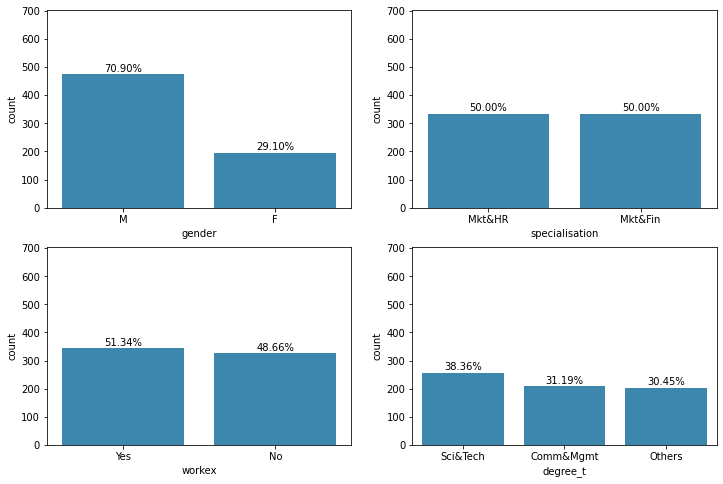

In [ ]:
plt.subplot(221),grafico_com_porcetagem(train[['gender']],'gender')
plt.subplot(222),grafico_com_porcetagem(train[['specialisation']],'specialisation')
plt.subplot(223),grafico_com_porcetagem(train[['workex']],'workex')
plt.subplot(224),grafico_com_porcetagem(train[['degree_t']],'degree_t')
plt.show()

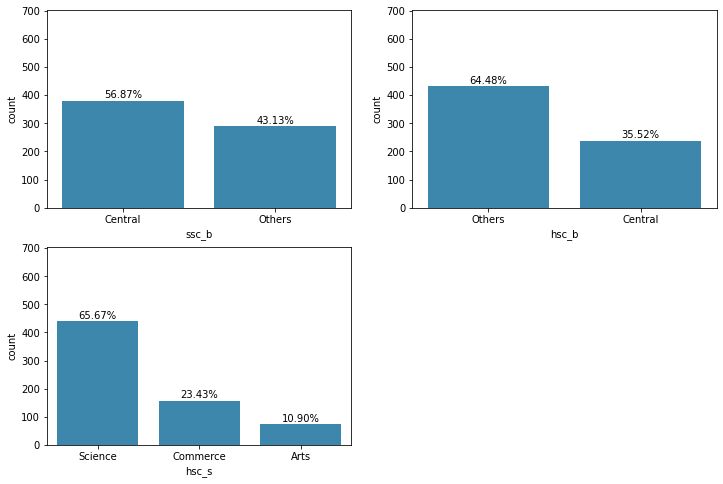

In [ ]:
plt.subplot(221),grafico_com_porcetagem(train[['ssc_b']],'ssc_b')
plt.subplot(222),grafico_com_porcetagem(train[['hsc_b']],'hsc_b')
plt.subplot(223),grafico_com_porcetagem(train[['hsc_s']],'hsc_s')
plt.show()

Placed        439
Not Placed    231
Name: status, dtype: int64


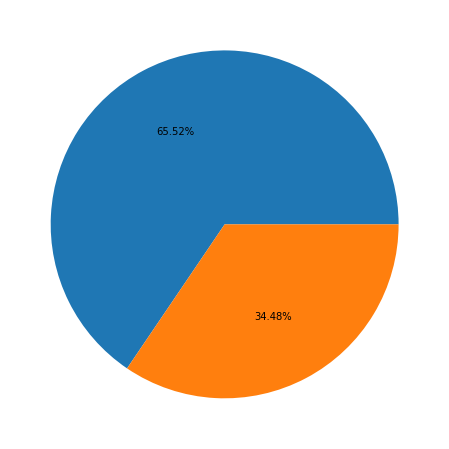

In [ ]:
print(train['status'].value_counts())
plt.pie(train['status'].value_counts(),autopct='%.2f%%');

In [ ]:
train.groupby('gender')['status'].value_counts(normalize=True)

gender  status    
F       Placed        0.815385
        Not Placed    0.184615
M       Placed        0.589474
        Not Placed    0.410526
Name: status, dtype: float64

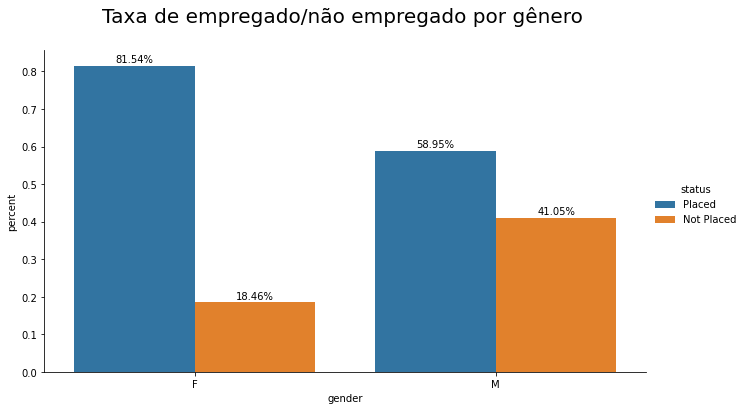

In [ ]:
df1 = train.groupby('gender')['status'].value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()#.sort_values(by=['percent'], ascending = True)

g = sns.catplot(x='gender',y='percent',hue='status',kind='bar',data=df1, height=5,aspect = 1.8,palette="tab10")
grafico_com_porcetagem_1(g)
plt.title('Taxa de empregado/não empregado por gênero \n', fontsize=20)
plt.show()

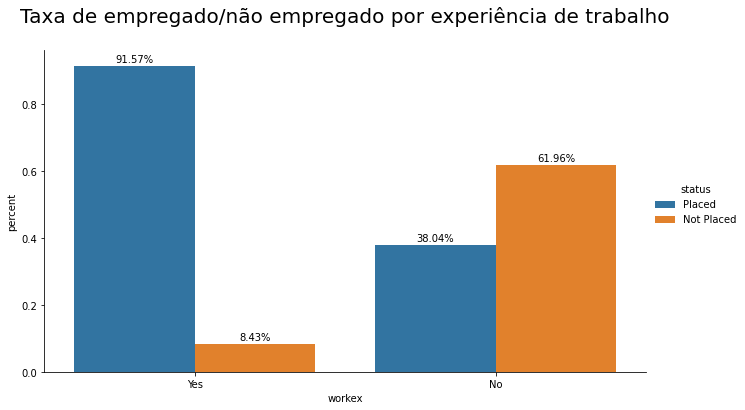

In [ ]:
df1 = train.groupby('workex')['status'].value_counts(normalize=True)
df1 = df1.rename('percent').reset_index().sort_values(by=['percent'], ascending = False)

g = sns.catplot(x='workex',y='percent',hue='status',kind='bar',data=df1, height=5,aspect = 1.8,palette="tab10")
grafico_com_porcetagem_1(g)
plt.title('Taxa de empregado/não empregado por experiência de trabalho\n', fontsize=20)
plt.show()

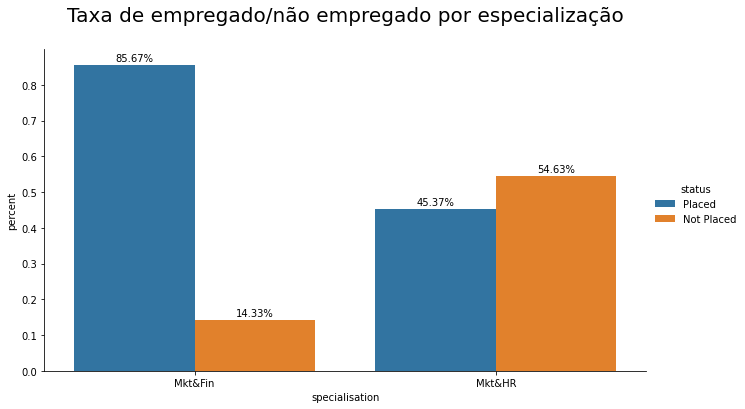

In [ ]:
df1 = train.groupby('specialisation')['status'].value_counts(normalize=True)
df1 = df1.rename('percent').reset_index().sort_values(by=['percent'], ascending = False)

g = sns.catplot(x='specialisation',y='percent',hue='status',kind='bar',data=df1, height=5,aspect = 1.8,palette="tab10")
grafico_com_porcetagem_1(g)
plt.title('Taxa de empregado/não empregado por especialização\n', fontsize=20)
plt.show()

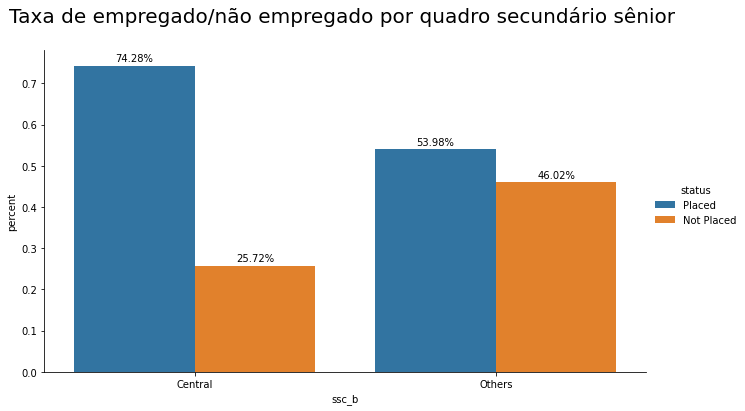

In [ ]:
df1 = train.groupby('ssc_b')['status'].value_counts(normalize=True)
df1 = df1.rename('percent').reset_index().sort_values(by=['percent'], ascending = False)

g = sns.catplot(x='ssc_b',y='percent',hue='status',kind='bar',data=df1, height=5,aspect = 1.8,palette="tab10")
grafico_com_porcetagem_1(g)
plt.title('Taxa de empregado/não empregado por quadro secundário sênior \n', fontsize=20)
plt.show()

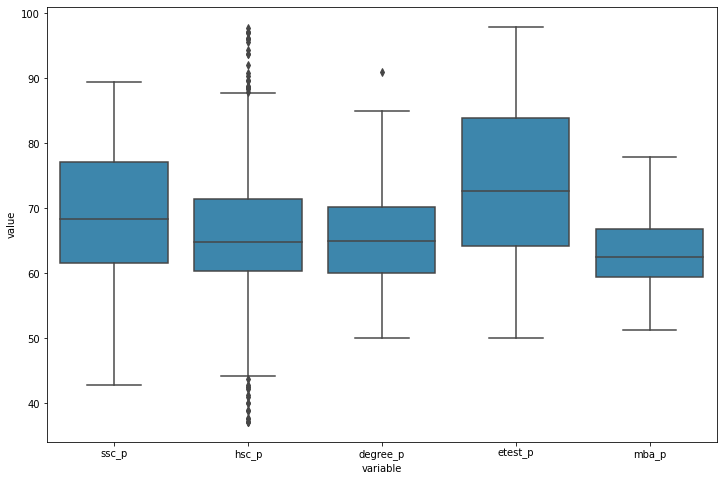

In [ ]:
App = train.loc[:,['ssc_p', 'hsc_p','degree_p','etest_p','mba_p']]
sns.boxplot(x = 'variable', y = 'value', data = App.melt(),color='#2b8cbe');

* Transformando a variável resposta

In [ ]:
train['status'].replace({'Not Placed':0,'Placed':1},inplace=True)

* Verificando as correlações entre variáveis

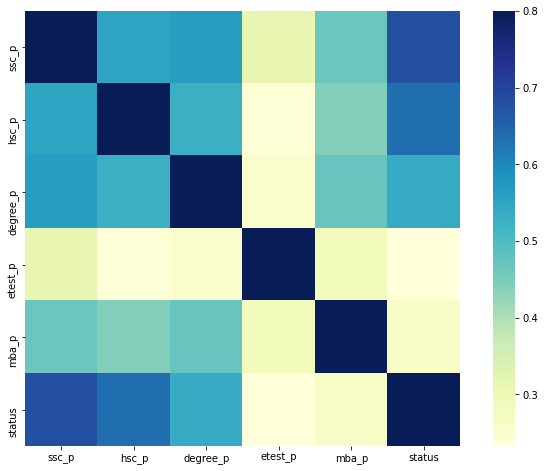

In [ ]:
corr = train.corr()
sns.heatmap(corr, vmax=.8, square=True, cmap="YlGnBu");

* Separando a variável resposta das variáveis preditoras

In [ ]:
X = train.drop(['status'], axis = 1)
y = train.status

* Criando variáveis fictícias para as variáveis categóricas

In [ ]:
X = pd.get_dummies(X)
test_X =  pd.get_dummies(test)

* Dividindo o conjunto de treinamento

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test =  train_test_split(X,y, test_size = 0.33)

## Importando os modelos

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import SVC
import datetime
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import accuracy_score

## Treinando os medelos

In [ ]:
execution_results = []
# Definindo os modelos:
# [modelo, * dict * com parâmetros a serem testados, * lista * de UM item com o redimensionador a ser usado]
modelos = ['RidgeClassifierCV','LogisticRegression','ExtraTreesClassifier',
          'NearestCentroid','SVC','BernoulliNB']
score_model = [] # acurácia
MSE = [] # Erro quadrático médio
measured_time_train = []
models = [
    [RidgeClassifierCV(), {}, [Normalizer()]],
    [LogisticRegression(), {}, [Normalizer()]],
    [ExtraTreesClassifier(n_estimators=100), {}, [Normalizer()]],
    [NearestCentroid(), {}, [Normalizer()]],
    [SVC(), {}, [Normalizer()]],
    [BernoulliNB(), {}, [Normalizer()]],
]

best_score = 9999999999999
best_clf = None

def loss_func(y_true, y_predicted):
    return mean_squared_error(y_true, y_predicted, squared=False)

score = make_scorer(loss_func, greater_is_better=False)

for classifier in models:
    print("Training {}...".format(type(classifier[0]).__name__))
    begin_time = datetime.datetime.now()

    clf=classifier[0].fit(X_train, y_train) 
    msd_time_train = datetime.datetime.now() - begin_time
    measured_time_train.append(format(msd_time_train))
    # Prever com o conjunto de teste
    begin_time = datetime.datetime.now()
    y_pred = clf.predict(X_test)
    # Calculando o tempo decorrido 
    measured_time_test = datetime.datetime.now() - begin_time
    # Calculando erro quadrático médio 
    error = mean_squared_error(y_test, y_pred, squared=False)
    MSE.append(error)
    # Calculando a acurácia
    score = accuracy_score(y_test, y_pred)
    score_model.append(score)
    if error < best_score:
        best_score = error
        best_clf = clf

Training RidgeClassifierCV...
Training LogisticRegression...
Training ExtraTreesClassifier...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training NearestCentroid...
Training SVC...
Training BernoulliNB...


## Resultados dos modelos

In [ ]:
md = pd.DataFrame({'modelos': modelos,
                   'mse': MSE,
                   'score':score_model,
                   'tempo decorrido de treinamento':measured_time_train})
md.sort_values(['mse', 'score'])

,modelos,mse,score,tempo decorrido de treinamento
2,ExtraTreesClassifier,0.222597,0.950450,0:00:00.186843
1,LogisticRegression,0.300150,0.909910,0:00:00.079376
0,RidgeClassifierCV,0.328798,0.891892,0:00:00.011839
4,SVC,0.379663,0.855856,0:00:00.007641
3,NearestCentroid,0.413728,0.828829,0:00:00.002050
5,BernoulliNB,0.464991,0.783784,0:00:00.002263


In [ ]:
print("A melhor pontuação foi {} por clf {}".format(best_score, str(best_clf)))

A melhor pontuação foi 0.22259728109199706 por clf ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)


* Fazendo pevisão com o conjunto de dados X_test

In [ ]:
y_pred = best_clf.predict(X_test)

* Verificando quão bom é o modelo para o conjunto de dados X_test

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        78
           1       0.96      0.97      0.96       144

    accuracy                           0.95       222
   macro avg       0.95      0.94      0.95       222
weighted avg       0.95      0.95      0.95       222



* Visualizando a matriz de confusão

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[ 72   6]
 [  5 139]]


In [ ]:
target = best_clf.predict(test_X)
res = pd.DataFrame(target)
res.columns = ["prediction"]

In [ ]:
res.head(3)

,prediction
0,1
1,1
2,1


* Convertendo os valores 0 e 1 para Not Placed e Placed

In [ ]:
res['prediction'].replace({0:'Not Placed',1:'Placed'},inplace=True) 

In [ ]:
res.head()

,prediction
0,Placed
1,Placed
2,Placed
3,Placed
4,Placed


* Baixando o arquivo csv localmente

In [ ]:
from google.colab import files
res.to_csv('Sample_Submission.csv',index=False)         
#files.download('Sample_Submission.csv')

In [ ]:
pd.read_csv('Sample_Submission.csv')

,prediction
0,Placed
1,Placed
2,Placed
3,Placed
4,Placed
...,...
443,Placed
444,Placed
445,Placed
446,Not Placed
